In [1]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpol
from pyccl._core import UnlockInstance
from scipy import signal

In [2]:
# import BCMprofiles_functional as BCMprofiles
import BCMprofiles_multiChoice_test0 as BCMprofiles
BCMprofiles.__all__

/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCM/BCMprofiles_multiChoice_test0.py:156: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the stellar density profile
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCM/BCMprofiles_multiChoice_test0.py:253: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the bound gas density profile where:
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCM/BCMprofiles_multiChoice_test0.py:376: SyntaxWarning: invalid escape sequence '\e'
  """Combined profile for the stellar & ejected & bound gas & cdm components (ie- The BCM Model), with the truncated Navarro-Frenk-White (NFW) profile used to calculate the density profiles of the cold dark matter (cdm) component.


('Initialiser',
 'StellarProfile',
 'EjectedGasProfile',
 'BoundGasProfile',
 'CDMProfile',
 'BCMProfile')

In [3]:
help(ccl.halos.profiles.profile_base.HaloProfile.__init__)

Help on function __init__ in module pyccl.halos.profiles.profile_base:

__init__(self, *, mass_def, concentration=None, is_number_counts=False)
    Initialize self.  See help(type(self)) for accurate signature.



# Setting up pars & profiles

In [5]:
hmd_200c = ccl.halos.MassDef200c # use a mass definition with Delta = 200
cM = ccl.halos.ConcentrationDuffy08(mass_def=hmd_200c)
cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.07, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)

trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
trial_k = np.geomspace(1E-3,9E1,100000) # np.geomspace(1E-3,1E2,100000)
trial_M = np.array([3E12,6E13, 1E14])
trial_gamma = 1.1  # working with z = 0 (today) ; therefore a = 1 [default]
trial_f_bd = 0.6

## Loading profiles, with fourier_analytic = True

In [7]:
cdm_profile = BCMprofiles.CDMProfile(cosmo, hmd_200c, cM, trial_gamma)
stel_profile = BCMprofiles.StellarProfile(cosmo, hmd_200c, cM, trial_gamma)
ej_profile = BCMprofiles.EjectedGasProfile(cosmo, hmd_200c, cM, trial_gamma)
bd_profile = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, trial_gamma)
bcm_profile = BCMprofiles.BCMProfile(cosmo, hmd_200c, cM, trial_gamma)

In [8]:
#cdm_profile.update_parameters(A_star=2)
stel_profile.A_star

0.03

In [12]:
cdm_real = cdm_profile._real(cosmo, trial_r, trial_M)
stel_real = stel_profile._real(cosmo, trial_r, trial_M)
ej_real = ej_profile._real(cosmo, trial_r, trial_M)
bd_real = bd_profile._real(cosmo, trial_r, trial_M)
bcm_real = bcm_profile._real(cosmo, trial_r, trial_M)

[[4.26474613e+08 4.26474612e+08 4.26474612e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.35213224e+08 2.35213224e+08 2.35213224e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.98097402e+08 1.98097402e+08 1.98097402e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] [[1.18679829e+13 1.18673273e+13 1.18666716e+13 ... 1.63058865e-61
  1.62702540e-61 1.62346993e-61]
 [2.20859978e+13 2.20856381e+13 2.20852783e+13 ... 3.60067154e-56
  3.59283066e-56 3.58500684e-56]
 [2.25237643e+13 2.25234672e+13 2.25231701e+13 ... 2.72438062e-55
  2.71845179e-55 2.71253586e-55]] [[8.99836441e+10 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.02075232e+12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.37350009e+12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] [[3.77536617e+14 3.77441422e+14 3.77346249e+14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.860

In [ ]:
cdm_fourier = cdm_profile._fourier(trial_k, trial_M)
stel_fourier = stel_profile._fourier(trial_k, trial_M)
ej_fourier = ej_profile._fourier(trial_k, trial_M)
bd_fourier = bd_profile._fourier(trial_k, trial_M)
bcm_fourier = bcm_profile._fourier(trial_k, trial_M)

Qany = 1.56% through
Qany = 3.12% through
Qany = 4.69% through
Qany = 6.25% through
Qany = 7.81% through
Qany = 9.38% through
Qany = 10.9% through
Qany = 12.5% through
Qany = 14.1% through
Qany = 15.6% through
Qany = 17.2% through
Qany = 18.8% through
Qany = 20.3% through
Qany = 21.9% through
Qany = 23.4% through
Qany = 25% through
Qany = 26.6% through
Qany = 28.1% through
Qany = 29.7% through
Qany = 31.2% through
Qany = 32.8% through
Qany = 34.4% through
Qany = 35.9% through
Qany = 37.5% through
Qany = 39.1% through
Qany = 40.6% through
Qany = 42.2% through
Qany = 43.8% through
Qany = 45.3% through
Qany = 46.9% through
Qany = 48.4% through
Qany = 50% through
Qany = 51.6% through
Qany = 53.1% through
Qany = 54.7% through
Qany = 56.2% through
Qany = 57.8% through
Qany = 59.4% through
Qany = 60.9% through
Qany = 62.5% through


In [ ]:
bcm_profile = BCMprofiles.BCMProfile(cosmo, hmd_200c, cM, trial_gamma)
bcm_real = bcm_profile._real(cosmo, trial_r, trial_M)

In [ ]:
ej_real

In [ ]:
four_plot, four_plot2, four_plot3, four_plot4 = ej_real, bd_real, stel_real, cdm_real
for prof, prof2, mass in zip(four_plot, four_plot2, trial_M):
    plt.plot(trial_r, prof)
    plt.plot(trial_r, prof2, ':')
   # plt.axhline(mass, linestyle='--', zorder=1)
#plt.yscale('log')
plt.ylim(0,0.2E13)
plt.xscale('log');

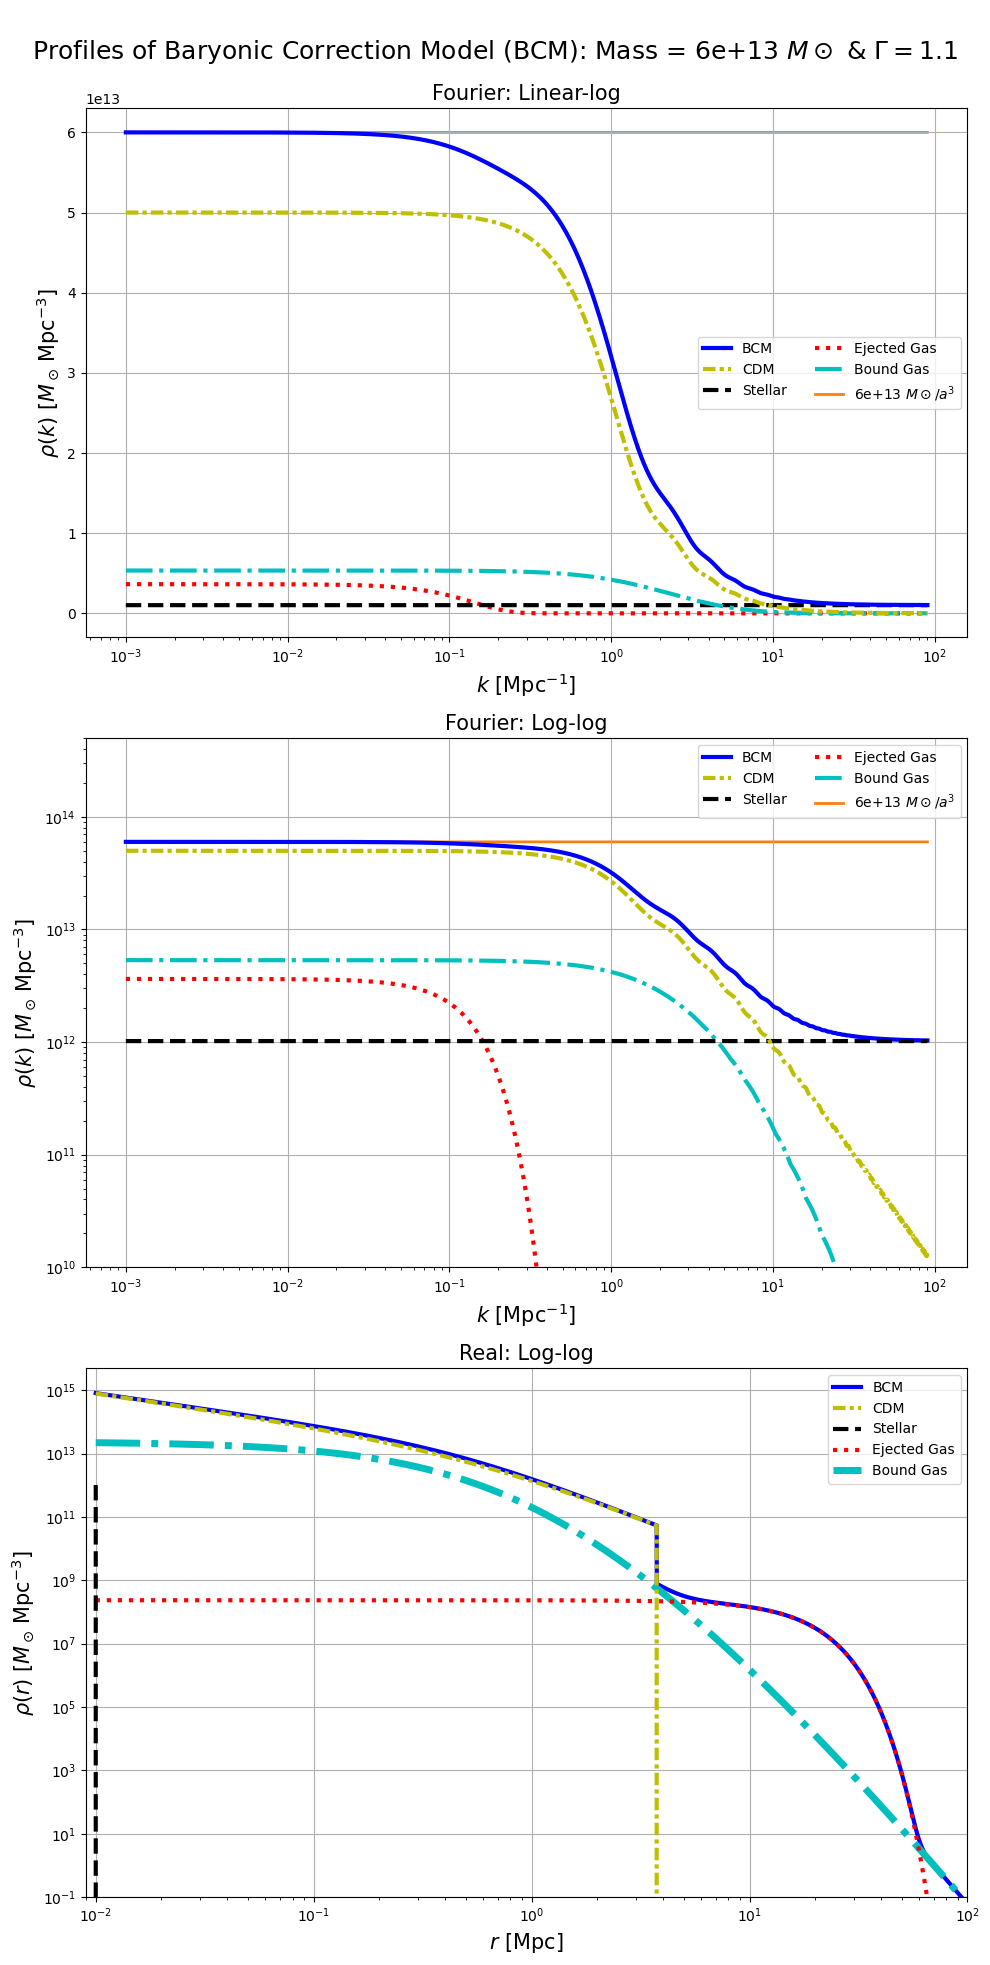

In [49]:
i = 1
title_combined = f'\nProfiles of Baryonic Correction Model (BCM): Mass = {trial_M[i]:.1g} $M \\odot$ & $\\Gamma = ${trial_gamma}\n' 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,20))
fig.suptitle(title_combined, fontsize=18)

ax1.plot(trial_k, bcm_fourier[i], 'b-', 
         lw=3, zorder = 5, label='BCM')
ax1.plot(trial_k, cdm_fourier[i], linestyle=(0, (3,1,1,1)), color='y', lw=3, 
         zorder=6, label='CDM')
ax1.plot(trial_k, stel_fourier[i], 'k--', lw=3, zorder = 3, label='Stellar')
ax1.plot(trial_k, ej_fourier[i], 'r:', 
         lw=3, zorder = 2, label='Ejected Gas')
ax1.plot(trial_k, bd_fourier[0,i], 'c-.', 
         lw=3, zorder = 4, label='Bound Gas')
ax1.plot(trial_k, 1*trial_k + trial_M[i], 'tab:orange', zorder=1, lw=2, label=f'{trial_M[i]:.1g} $M \\odot /a^3$')
    
ax1.set_ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax1.set_xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
ax1.set_title('Fourier: Linear-log', fontsize=15)
ax1.grid(True)
ax1.legend(loc='best', ncol=2)
ax1.set_xscale('log'); 
##########################
ax2.plot(trial_k, bcm_fourier[i], 'b-', lw=3, zorder = 5, label='BCM')
ax2.plot(trial_k, cdm_fourier[i], linestyle=(0, (3,1,1,1)), color='y', lw=3, 
         zorder=6, label='CDM')
ax2.plot(trial_k, stel_fourier[i], 'k--', lw=3, zorder = 5, label='Stellar')
ax2.plot(trial_k, ej_fourier[i], 'r:', lw=3, zorder = 4, label='Ejected Gas')
ax2.plot(trial_k, bd_fourier[0,i], 'c-.', lw=3, zorder = 3, label='Bound Gas')
ax2.plot(trial_k, 1*trial_k + trial_M[i], 'tab:orange', zorder=1, lw=2, label=f'{trial_M[i]:.1g} $M \\odot /a^3$')
    
ax2.set_ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax2.set_xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
ax2.set_title('Fourier: Log-log', fontsize=15)
ax2.grid(True)
ax2.legend(loc='best', ncol=2)
ax2.set_xscale('log'); 
ax2.set_ylim(1E10, 5E14)
#ax2.set_ylim(5E10)
ax2.set_yscale('log');
#########################
ax3.plot(trial_r, bcm_real[i], 'b-', lw=3, zorder = 3, label='BCM')
ax3.plot(trial_r, cdm_real[i], linestyle=(0, (3,1,1,1)), color='y', lw=3, 
         zorder=7, label='CDM')
ax3.plot(trial_r, stel_real[i], 'k--', lw=3, zorder = 5, label='Stellar')
ax3.plot(trial_r, ej_real[i], 'r:', lw=3, zorder = 4, label='Ejected Gas')
ax3.plot(trial_r, bd_real[i], 'c-.', lw=5, zorder = 3, label='Bound Gas')
    
ax3.set_ylabel(r'$\rho(r)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
ax3.set_xlabel(r'$r\, \,[{\rm Mpc}]$', fontsize=15);
ax3.set_title('Real: Log-log', fontsize=15)
ax3.grid(True)
ax3.legend(loc='best')
ax3.set_xscale('log'); 
ax3.set_ylim(1E-1, 5E15)
ax3.set_xlim(9E-3, 1E2)
ax3.set_yscale('log');

fig.tight_layout();
#fig.savefig('./BCM_real&Fourier_plot_0108.pdf', dpi=500);